In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import font_manager, rc
import warnings

# 그래프 한글처리(from matplotlib import font_manager, rc)
fontname = font_manager.FontProperties(fname='C://myData//Fonts///malgun.ttf').get_name()
rc('font',family=fontname)

# notebook에 graph 출력
%matplotlib inline

# ggplot style 사용해 graph 출력
plt.style.use('ggplot')

# graph 한글폰트 사용시 마이너스 기호 출력 
mpl.rcParams['axes.unicode_minus'] = False

# warning 무시
warnings.filterwarnings("ignore")

In [2]:

# 맨위에 두줄 제거
df = pd.read_csv('data/total_food.csv', encoding='cp949', skiprows=2)


df.info() # 총 235컬럼. 최적화 위해 필요한 컬럼만 추출하여야 할듯
# 일단 가장 최소한의 컬럼만 추출하고 이후 필요한 컬럼이 있으면 따로 추가
df = df.iloc[:,[2,3,4,5,7,9,10,11,12,13,14,15,16,17,18,19,20]]
print(df.columns)
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47606 entries, 0 to 47605
Columns: 235 entries, NO to 발행기관
dtypes: float64(208), int64(15), object(12)
memory usage: 85.4+ MB
Index(['식품코드', 'DB군', '상용제품', '식품명', '지역 / 제조사', '식품대분류', '식품상세분류', '1회제공량',
       '내용량_단위', '총내용량(g)', '총내용량(mL)', '에너지(㎉)', '에너지(kj)', '수분(g)', '수분(%)',
       '단백질(g)', '지방(g)'],
      dtype='object')
      식품코드 DB군  상용제품   식품명 지역 / 제조사 식품대분류 식품상세분류  1회제공량 내용량_단위  총내용량(g)  \
0  D000006  음식  품목대표  꿩불고기       충주   구이류   육류구이  500.0      g      0.0   
1  D000007  음식  품목대표   닭갈비   전국(대표)   구이류   육류구이  400.0      g      0.0   
2  D000008  음식  품목대표   닭갈비       춘천   구이류   육류구이  300.0      g      0.0   
3  D000009  음식  품목대표   닭꼬치   전국(대표)   구이류   육류구이   70.0      g      0.0   
4  D000010  음식  품목대표  더덕구이   전국(대표)   구이류  채소류구이  100.0      g      0.0   

   총내용량(mL)   에너지(㎉)  에너지(kj)    수분(g)  수분(%)  단백질(g)   지방(g)  
0       0.0  368.800        0  412.600    0.0  33.500   8.500  
1       0.0  595.610        0  276.400  

식품코드          0
DB군           0
상용제품          0
식품명           0
지역 / 제조사      2
식품대분류         0
식품상세분류        0
1회제공량         0
내용량_단위      303
총내용량(g)       0
총내용량(mL)      0
에너지(㎉)        0
에너지(kj)       0
수분(g)         0
수분(%)         0
단백질(g)        0
지방(g)         0
dtype: int64

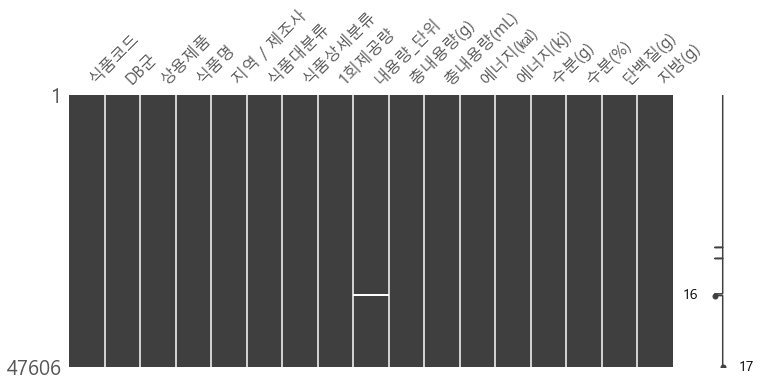

In [4]:
import missingno as msno
msno.matrix(df, figsize=(12,5))
df.isnull().sum()

In [6]:
df['DB군'].value_counts()

가공식품    35745
음식       7407
농축산물     3088
수산물      1366
Name: DB군, dtype: int64

In [7]:
df['상용제품'].value_counts()

상용제품    35745
외식       6568
품목대표     5293
Name: 상용제품, dtype: int64

In [8]:
df['식품명'].value_counts()

생칼국수                  18
레몬에이드                 17
육개장                   17
크로크무슈                 16
지중해담치                 14
전복죽                   14
기름가자미-암컷              12
기름가자미-수컷              12
비피더스 사과               12
고등어                   12
카페라떼                  11
카페모카                  11
우유식빵                  11
카푸치노                  11
콘샐러드                  10
호박죽                   10
단호박죽                  10
그린티                   10
새꼬막                   10
스프라이트                 10
단팥빵                   10
아메리카노                 10
양송이스프                 10
코카콜라                  10
에스프레소                 10
플레인 베이글                9
바나나우유                  9
바나나칩                   9
살오징어-암컷                9
불고기버거                  9
                      ..
맛상 영양닭죽                1
바질잎, 생것                1
치즈블라썸 스테이크 골드R         1
밀크티 (얼그레이)             1
생명물두부                  1
간편한 미역국                1
홍합, 통조림                1
아기밀 업그레이드-2            1
청정원 햇살담은 양조진간장 진한맛     1


In [9]:
df[df['식품명']=='전복죽']
# 식품명 같고 제조사가 다른 제품 존재

,식품코드,DB군,상용제품,식품명,지역 / 제조사,식품대분류,식품상세분류,1회제공량,내용량_단위,총내용량(g),총내용량(mL),에너지(㎉),에너지(kj),수분(g),수분(%),단백질(g),지방(g)
7246,D018461,음식,품목대표,전복죽,전국(대표),죽 및 스프류,죽류,400.0,g,0.0,0.0,317.0,0,337.5,0.0,7.3,14.90
22798,P025815,가공식품,상용제품,전복죽,오뚜기,즉석조리식품,즉석조리식품,285.0,g,285.0,0.0,155.0,0,0.0,0.0,4.0,4.00
25289,P028422,가공식품,상용제품,전복죽,㈜동원홈푸드,즉석조리식품,즉석조리식품,287.5,g,287.5,0.0,345.0,0,0.0,0.0,9.0,9.00
25306,P028439,가공식품,상용제품,전복죽,㈜송림푸드,즉석조리식품,즉석조리식품,250.0,g,250.0,0.0,170.0,0,0.0,0.0,5.0,1.50
27837,P032348,가공식품,상용제품,전복죽,㈜동원홈푸드,즉석조리식품,즉석조리식품,287.5,g,287.5,0.0,345.0,0,0.0,0.0,9.0,9.00
29081,P036253,가공식품,상용제품,전복죽,해보식품,즉석조리식품,즉석조리식품,220.0,g,220.0,0.0,347.0,0,0.0,0.0,6.0,5.00
29117,P036289,가공식품,상용제품,전복죽,다림식품,즉석조리식품,즉석조리식품,500.0,g,500.0,0.0,75.0,0,0.0,0.0,2.0,2.00
29868,P037041,가공식품,상용제품,전복죽,한빛수산,즉석조리식품,즉석조리식품,100.0,g,300.0,0.0,274.8,0,0.0,0.0,7.1,5.26
29961,P037134,가공식품,상용제품,전복죽,주식회사 인세이버,즉석조리식품,즉석조리식품,100.0,g,400.0,0.0,61.0,0,0.0,0.0,2.0,0.00
33383,P040556,가공식품,상용제품,전복죽,오뚜기,즉석조리식품,즉석조리식품,285.0,g,285.0,0.0,155.0,0,0.0,0.0,6.0,4.00


In [13]:
df['지역 / 제조사'].value_counts()

전국(대표)                                 4110
빙그레                                     684
CJ제일제당㈜                                 673
롯데제과㈜                                   650
뚜레쥬르                                    547
자연드림                                    526
남양유업                                    491
부산                                      487
파리바게뜨                                   456
오뚜기                                     419
㈜삼림식품                                   367
농심                                      346
㈜샤니                                     331
스타벅스                                    328
㈜동원에프앤비                                 326
커피마마                                    306
동원산업                                    256
파파존스                                    255
롯데칠성음료㈜                                 252
투썸플레이스                                  244
대상㈜                                     235
㈜에스피씨삼립                                 227
카페베네                            

In [16]:
df['지역 / 제조사'].value_counts().describe()
# 한자리수 지역/제조사 삭제 고려..

count    3553.000000
mean       13.398255
std        79.235223
min         1.000000
25%         1.000000
50%         2.000000
75%         7.000000
max      4110.000000
Name: 지역 / 제조사, dtype: float64

In [36]:
df['식품대분류'].value_counts()

빵류               7671
즉석조리식품           4787
과자               3847
농축산물             3088
음료 및 차류          2470
즉석섭취식품           1720
과/채주스            1448
초콜릿가공품           1426
혼합음료             1390
수산물              1366
과/채음료            1076
캔디류               981
아이스크림             911
유탕면               763
가공유               687
탄산음료              670
아이스밀크             584
농후발효유             582
우유                481
커피                461
만두                459
건면                412
프레스햄              359
소시지               348
영/유아용 이유식         346
아이스크림류            324
튀김류               294
샤베트               293
가공치즈              262
가공두유              251
                 ... 
물엿                  5
영아용 조제식             5
양념육                 5
조미건어포               5
베이컨류                5
추출가공식품              4
발효식초                4
쇼트닝                 4
두류가공품               3
크림발효유               3
임산/수유부용 식품          3
회류                  3
알함유가공품              2
식용돈지                2
가공연유      

In [37]:
df['식품상세분류'].value_counts()
# 식품대분류, 식품상세분류 둘중 하나로 선택 고려

즉석조리식품           4767
빵류               3599
즉석섭취식품           1679
과/채주스            1448
초콜릿가공품           1426
혼합음료             1390
피자류              1371
스낵과자             1291
과/채음료            1076
커피류              1006
아이스크림             911
유탕면               763
어류                747
차류                727
가공유               687
어패류 및 기타 수산물      674
탄산음료              670
기타빵류              650
비스킷               635
채소류               622
쿠키                592
아이스밀크             584
농후발효유             582
케이크류              544
우유                481
만두                459
스무디류              449
젤리                414
건면                412
과자                392
                 ... 
무스케익                3
고올레산해바라기유           3
곡류 및 서류             3
두류가공품               3
회류                  3
부침류                 2
야자유                 2
고추씨기름               2
올리고당가공품             2
혼합분유                2
가공연유                2
식용돈지                2
기타 면 및 만두류          2
밀크잼                 2
포류        

In [38]:
df['1회제공량'].describe()

count      47606.000000
mean         411.667718
std        15875.998803
min            0.500000
25%           84.000000
50%          100.000000
75%          200.000000
max      1000000.000000
Name: 1회제공량, dtype: float64

In [39]:
df['내용량_단위'].value_counts()

g     38213
mL     9090
Name: 내용량_단위, dtype: int64